In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("/content/drive/MyDrive/github/collegeproject/datasets/south_crop_class.csv")

In [3]:
df.columns

Index(['ph', 'rainfall', 'sowing_temp', 'harvesting_temp', 'P', 'N', 'K',
       'crop'],
      dtype='object')

In [4]:
x=df.iloc[:,0:-1].values 
y=df.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)


Inputs shape  (19414, 7)
Outputs shape  (19414,)


In [5]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.2)
normzr=Normalizer()
x_train=normzr.fit_transform(x_train)
x_test=normzr.transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15531, 7)
(3883, 7)
(15531,)
(3883,)


In [ ]:

# from sklearn.preprocessing import MinMaxScaler

# x_train, x_test, y_train, y_test = tts(x, y,random_state=2022)

# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# pickle.dump(scaler, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl", "wb"))

In [6]:
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/normalizer.pkl','rb'))

In [7]:
acc = []
model = []

Random forest Accuracy is:  100.0
                   precision    recall  f1-score   support

        arhar_tur       1.00      1.00      1.00       190
            bajra       1.00      1.00      1.00       196
        coriander       1.00      1.00      1.00       162
      cotton_lint       1.00      1.00      1.00       183
     cowpea_lobia       1.00      1.00      1.00        30
     dry_chillies       1.00      1.00      1.00       139
             gram       1.00      1.00      1.00       177
        groundnut       1.00      1.00      1.00       270
            jowar       1.00      1.00      1.00       162
          linseed       1.00      1.00      1.00        62
          maize_k       1.00      1.00      1.00       204
          maize_r       1.00      1.00      1.00       201
 moong_green_gram       1.00      1.00      1.00       215
            onion       1.00      1.00      1.00        92
peas_beans_pulses       1.00      1.00      1.00        12
           potato    

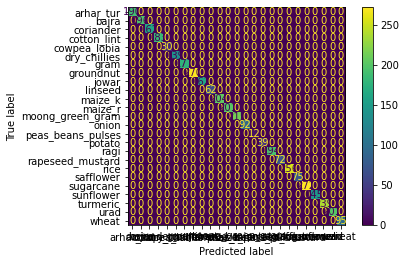

In [9]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

classifier = RandomForestClassifier(n_estimators=100,random_state=2022)
classifier.fit(x_train,y_train)
y_pred_forest=classifier.predict(x_test)

predicted_values = y_pred_forest
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Random Forest')
print("Random forest Accuracy is: ", x*100)
matrix_plot=confusion_matrix(y_test, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y_test, y_pred_forest))
#saving model
pickle.dump(classifier, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/forest_classifier.pkl", "wb"))

In [10]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2022,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))
#saving model
pickle.dump(DecisionTree, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/DecisionTree_classifier.pkl", "wb"))

DecisionTrees's Accuracy is:  97.91398403296421
                   precision    recall  f1-score   support

        arhar_tur       1.00      1.00      1.00       190
            bajra       1.00      1.00      1.00       196
        coriander       1.00      1.00      1.00       162
      cotton_lint       1.00      1.00      1.00       183
     cowpea_lobia       0.00      0.00      0.00        30
     dry_chillies       1.00      1.00      1.00       139
             gram       1.00      1.00      1.00       177
        groundnut       1.00      1.00      1.00       270
            jowar       1.00      1.00      1.00       162
          linseed       0.67      1.00      0.81        62
          maize_k       1.00      1.00      1.00       204
          maize_r       1.00      1.00      1.00       201
 moong_green_gram       1.00      1.00      1.00       215
            onion       1.00      1.00      1.00        92
peas_beans_pulses       0.00      0.00      0.00        12
       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving model
pickle.dump(NaiveBayes, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/NaiveBayes_classifier.pkl", "wb"))

Naive Bayes's Accuracy is:  1.0
                   precision    recall  f1-score   support

        arhar_tur       1.00      1.00      1.00       190
            bajra       1.00      1.00      1.00       196
        coriander       1.00      1.00      1.00       162
      cotton_lint       1.00      1.00      1.00       183
     cowpea_lobia       1.00      1.00      1.00        30
     dry_chillies       1.00      1.00      1.00       139
             gram       1.00      1.00      1.00       177
        groundnut       1.00      1.00      1.00       270
            jowar       1.00      1.00      1.00       162
          linseed       1.00      1.00      1.00        62
          maize_k       1.00      1.00      1.00       204
          maize_r       1.00      1.00      1.00       201
 moong_green_gram       1.00      1.00      1.00       215
            onion       1.00      1.00      1.00        92
peas_beans_pulses       1.00      1.00      1.00        12
           potato      

In [ ]:
from sklearn.svm import SVC

SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train,y_train)
predicted_values = SVM.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving the model
pickle.dump(SVM, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/SVM.pkl", "wb"))

SVM's Accuracy is:  0.9973333333333333
                   precision    recall  f1-score   support

        arhar_tur       1.00      1.00      1.00        18
            bajra       1.00      1.00      1.00        15
        coriander       1.00      1.00      1.00        17
      cotton_lint       1.00      1.00      1.00        17
     cowpea_lobia       1.00      0.91      0.95        11
     dry_chillies       1.00      1.00      1.00        16
             gram       1.00      1.00      1.00        14
        groundnut       1.00      1.00      1.00        16
            jowar       1.00      1.00      1.00        13
          linseed       1.00      1.00      1.00        17
          maize_k       1.00      1.00      1.00        19
          maize_r       1.00      1.00      1.00        13
 moong_green_gram       0.94      1.00      0.97        16
            onion       1.00      1.00      1.00        16
peas_beans_pulses       1.00      1.00      1.00        18
           potat

In [ ]:
# !pip uninstall xgboost 

# !pip install xgboost==0.90

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))
#saving the model
pickle.dump(XB, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/XB.pkl", "wb"))

ValueError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2022)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

#saving the model
pickle.dump(LogReg, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/LogReg.pkl", "wb"))

Logistic Regression's Accuracy is:  0.9893333333333333
                   precision    recall  f1-score   support

        arhar_tur       1.00      1.00      1.00        18
            bajra       1.00      1.00      1.00        15
        coriander       1.00      1.00      1.00        17
      cotton_lint       1.00      1.00      1.00        17
     cowpea_lobia       1.00      0.91      0.95        11
     dry_chillies       1.00      1.00      1.00        16
             gram       1.00      1.00      1.00        14
        groundnut       1.00      1.00      1.00        16
            jowar       1.00      1.00      1.00        13
          linseed       1.00      0.82      0.90        17
          maize_k       1.00      1.00      1.00        19
          maize_r       1.00      1.00      1.00        13
 moong_green_gram       0.94      1.00      0.97        16
            onion       1.00      1.00      1.00        16
peas_beans_pulses       1.00      1.00      1.00        18


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('knn')
print("knn Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

#saving the model
pickle.dump(LogReg, open("/content/drive/MyDrive/github/collegeproject/pickle_files/southside/knn.pkl", "wb"))

knn Accuracy is:  0.9973333333333333
                   precision    recall  f1-score   support

        arhar_tur       1.00      1.00      1.00        18
            bajra       1.00      1.00      1.00        15
        coriander       1.00      1.00      1.00        17
      cotton_lint       1.00      1.00      1.00        17
     cowpea_lobia       1.00      0.91      0.95        11
     dry_chillies       1.00      1.00      1.00        16
             gram       1.00      1.00      1.00        14
        groundnut       1.00      1.00      1.00        16
            jowar       1.00      1.00      1.00        13
          linseed       1.00      1.00      1.00        17
          maize_k       1.00      1.00      1.00        19
          maize_r       1.00      1.00      1.00        13
 moong_green_gram       0.94      1.00      0.97        16
            onion       1.00      1.00      1.00        16
peas_beans_pulses       1.00      1.00      1.00        18
           potato 

In [ ]:
df.sample(n=20, random_state=2022)

,ph,rainfall,sowing_temp,harvesting_temp,P,N,K,crop
800,6.602370,66.148206,18.854505,27.211792,37.664337,20.450280,20.462090,onion
1229,6.685670,80.381408,36.324125,37.308522,11.993567,24.926388,11.409179,dry_chillies
1191,5.543795,62.026654,24.943334,30.685624,51.495768,19.077482,0.000000,gram
424,5.015352,279.505525,31.349018,20.854793,10.654331,11.673592,9.044589,turmeric
1030,6.518228,31.569780,28.402627,16.843114,8.351433,18.851384,8.189361,jowar
358,6.409858,74.966527,21.836372,23.036448,48.520177,24.008243,10.795913,wheat
620,7.447512,18.157642,21.837393,23.216902,52.484992,10.417119,10.783720,rice
45,6.271836,84.398390,27.854293,31.966308,20.455046,5.005560,0.000000,cowpea_lobia
999,5.508288,91.355545,27.847567,30.907262,16.978827,44.584769,11.404101,maize_k
745,5.782101,39.566760,24.202847,14.459088,76.799188,25.987192,27.721202,potato


In [ ]:
#Loading and testing 

loaded_model=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/forest_classifier.pkl','rb'))
loaded_scale=pickle.load(open('/content/drive/MyDrive/github/collegeproject/pickle_files/southside/scale.pkl','rb'))
data =loaded_scale.transform( np.array([[6.271836,	84.398390	,27.854293	,31.966308,	20.455046	,5.005560,	0.000000]]))
prediction = loaded_model.predict(data)
print(prediction)

['cowpea_lobia']


In [ ]:
dff=pd.read_csv('/content/drive/MyDrive/github/collegeproject/datasets/south_crop_class.csv')

In [ ]:
dff['crop'].unique()

array(['arhar_tur', 'bajra', 'coriander', 'cotton_lint', 'dry_chillies',
       'gram', 'groundnut', 'jowar', 'maize_k', 'maize_r',
       'moong_green_gram', 'onion', 'potato', 'ragi', 'rice', 'sugarcane',
       'sunflower', 'turmeric', 'urad', 'wheat', 'linseed',
       'peas_beans_pulses', 'safflower', 'rapeseed_mustard',
       'cowpea_lobia'], dtype=object)

In [ ]:
x=dff.iloc[:,0:-1].values 
y=dff.iloc[:,-1].values
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)

Inputs shape  (19414, 7)
Outputs shape  (19414,)


In [ ]:
x=loaded_scale.transform(x)

Random forest Accuracy is:  100.0
                   precision    recall  f1-score   support

        arhar_tur       1.00      1.00      1.00      1064
            bajra       1.00      1.00      1.00       841
        coriander       1.00      1.00      1.00       867
      cotton_lint       1.00      1.00      1.00       974
     cowpea_lobia       1.00      1.00      1.00       181
     dry_chillies       1.00      1.00      1.00       650
             gram       1.00      1.00      1.00       895
        groundnut       1.00      1.00      1.00      1192
            jowar       1.00      1.00      1.00       756
          linseed       1.00      1.00      1.00       298
          maize_k       1.00      1.00      1.00      1093
          maize_r       1.00      1.00      1.00       862
 moong_green_gram       1.00      1.00      1.00      1077
            onion       1.00      1.00      1.00       500
peas_beans_pulses       1.00      1.00      1.00        60
           potato    

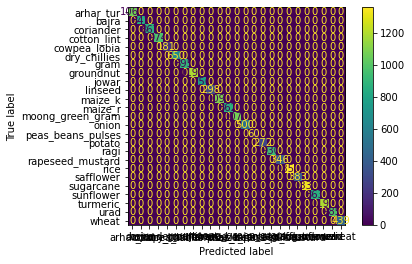

In [ ]:
y_pred_forest=loaded_model.predict(x)

predicted_values = y_pred_forest
per = metrics.accuracy_score(y, predicted_values)

print("Random forest Accuracy is: ", per*100)
matrix_plot=confusion_matrix(y, y_pred_forest, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=classifier.classes_)
disp.plot()
print(classification_report(y, y_pred_forest))

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

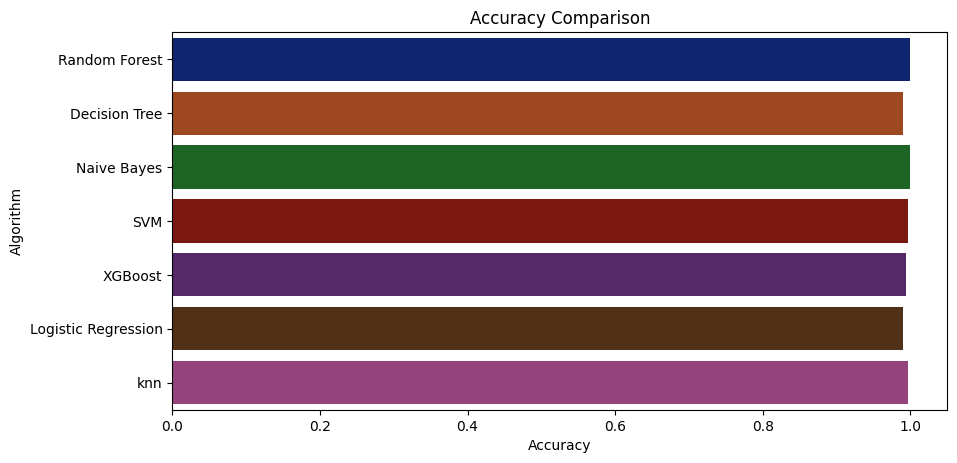

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')